In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animal-image-dataset-90-different-animals


In [5]:
#importing necessary library
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


In [6]:
#ensuring the gpu is used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("gpu is being use")
else:
  print("gpu is not used")

gpu is being use


In [19]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

# Update dataset_path to the correct location using the downloaded path
dataset_path = os.path.join(path, "animals", "animals")  # Assuming the dataset is in 'animals/animals' within the downloaded path

#list all the class of animal types
classes = os.listdir(dataset_path)
num_classes = len(classes)

#display number of class and all names
print(f'Number of classes: {num_classes}')
print(f'Types of classes: {classes}')

Path to dataset files: /kaggle/input/animal-image-dataset-90-different-animals
Number of classes: 90
Types of classes: ['beetle', 'parrot', 'fox', 'wolf', 'hedgehog', 'turtle', 'snake', 'shark', 'horse', 'antelope', 'hamster', 'woodpecker', 'eagle', 'chimpanzee', 'bison', 'penguin', 'butterfly', 'sandpiper', 'hornbill', 'lion', 'lobster', 'oyster', 'otter', 'grasshopper', 'raccoon', 'dog', 'pigeon', 'donkey', 'hippopotamus', 'hummingbird', 'bear', 'coyote', 'bee', 'pig', 'rat', 'owl', 'caterpillar', 'koala', 'squid', 'hare', 'whale', 'mouse', 'tiger', 'fly', 'lizard', 'orangutan', 'bat', 'porcupine', 'kangaroo', 'gorilla', 'starfish', 'mosquito', 'crow', 'possum', 'goldfish', 'swan', 'elephant', 'sheep', 'dragonfly', 'zebra', 'seal', 'octopus', 'cow', 'ox', 'wombat', 'reindeer', 'panda', 'duck', 'goose', 'goat', 'badger', 'flamingo', 'crab', 'seahorse', 'rhinoceros', 'dolphin', 'okapi', 'moth', 'sparrow', 'pelecaniformes', 'squirrel', 'leopard', 'jellyfish', 'ladybugs', 'cockroach', 'h

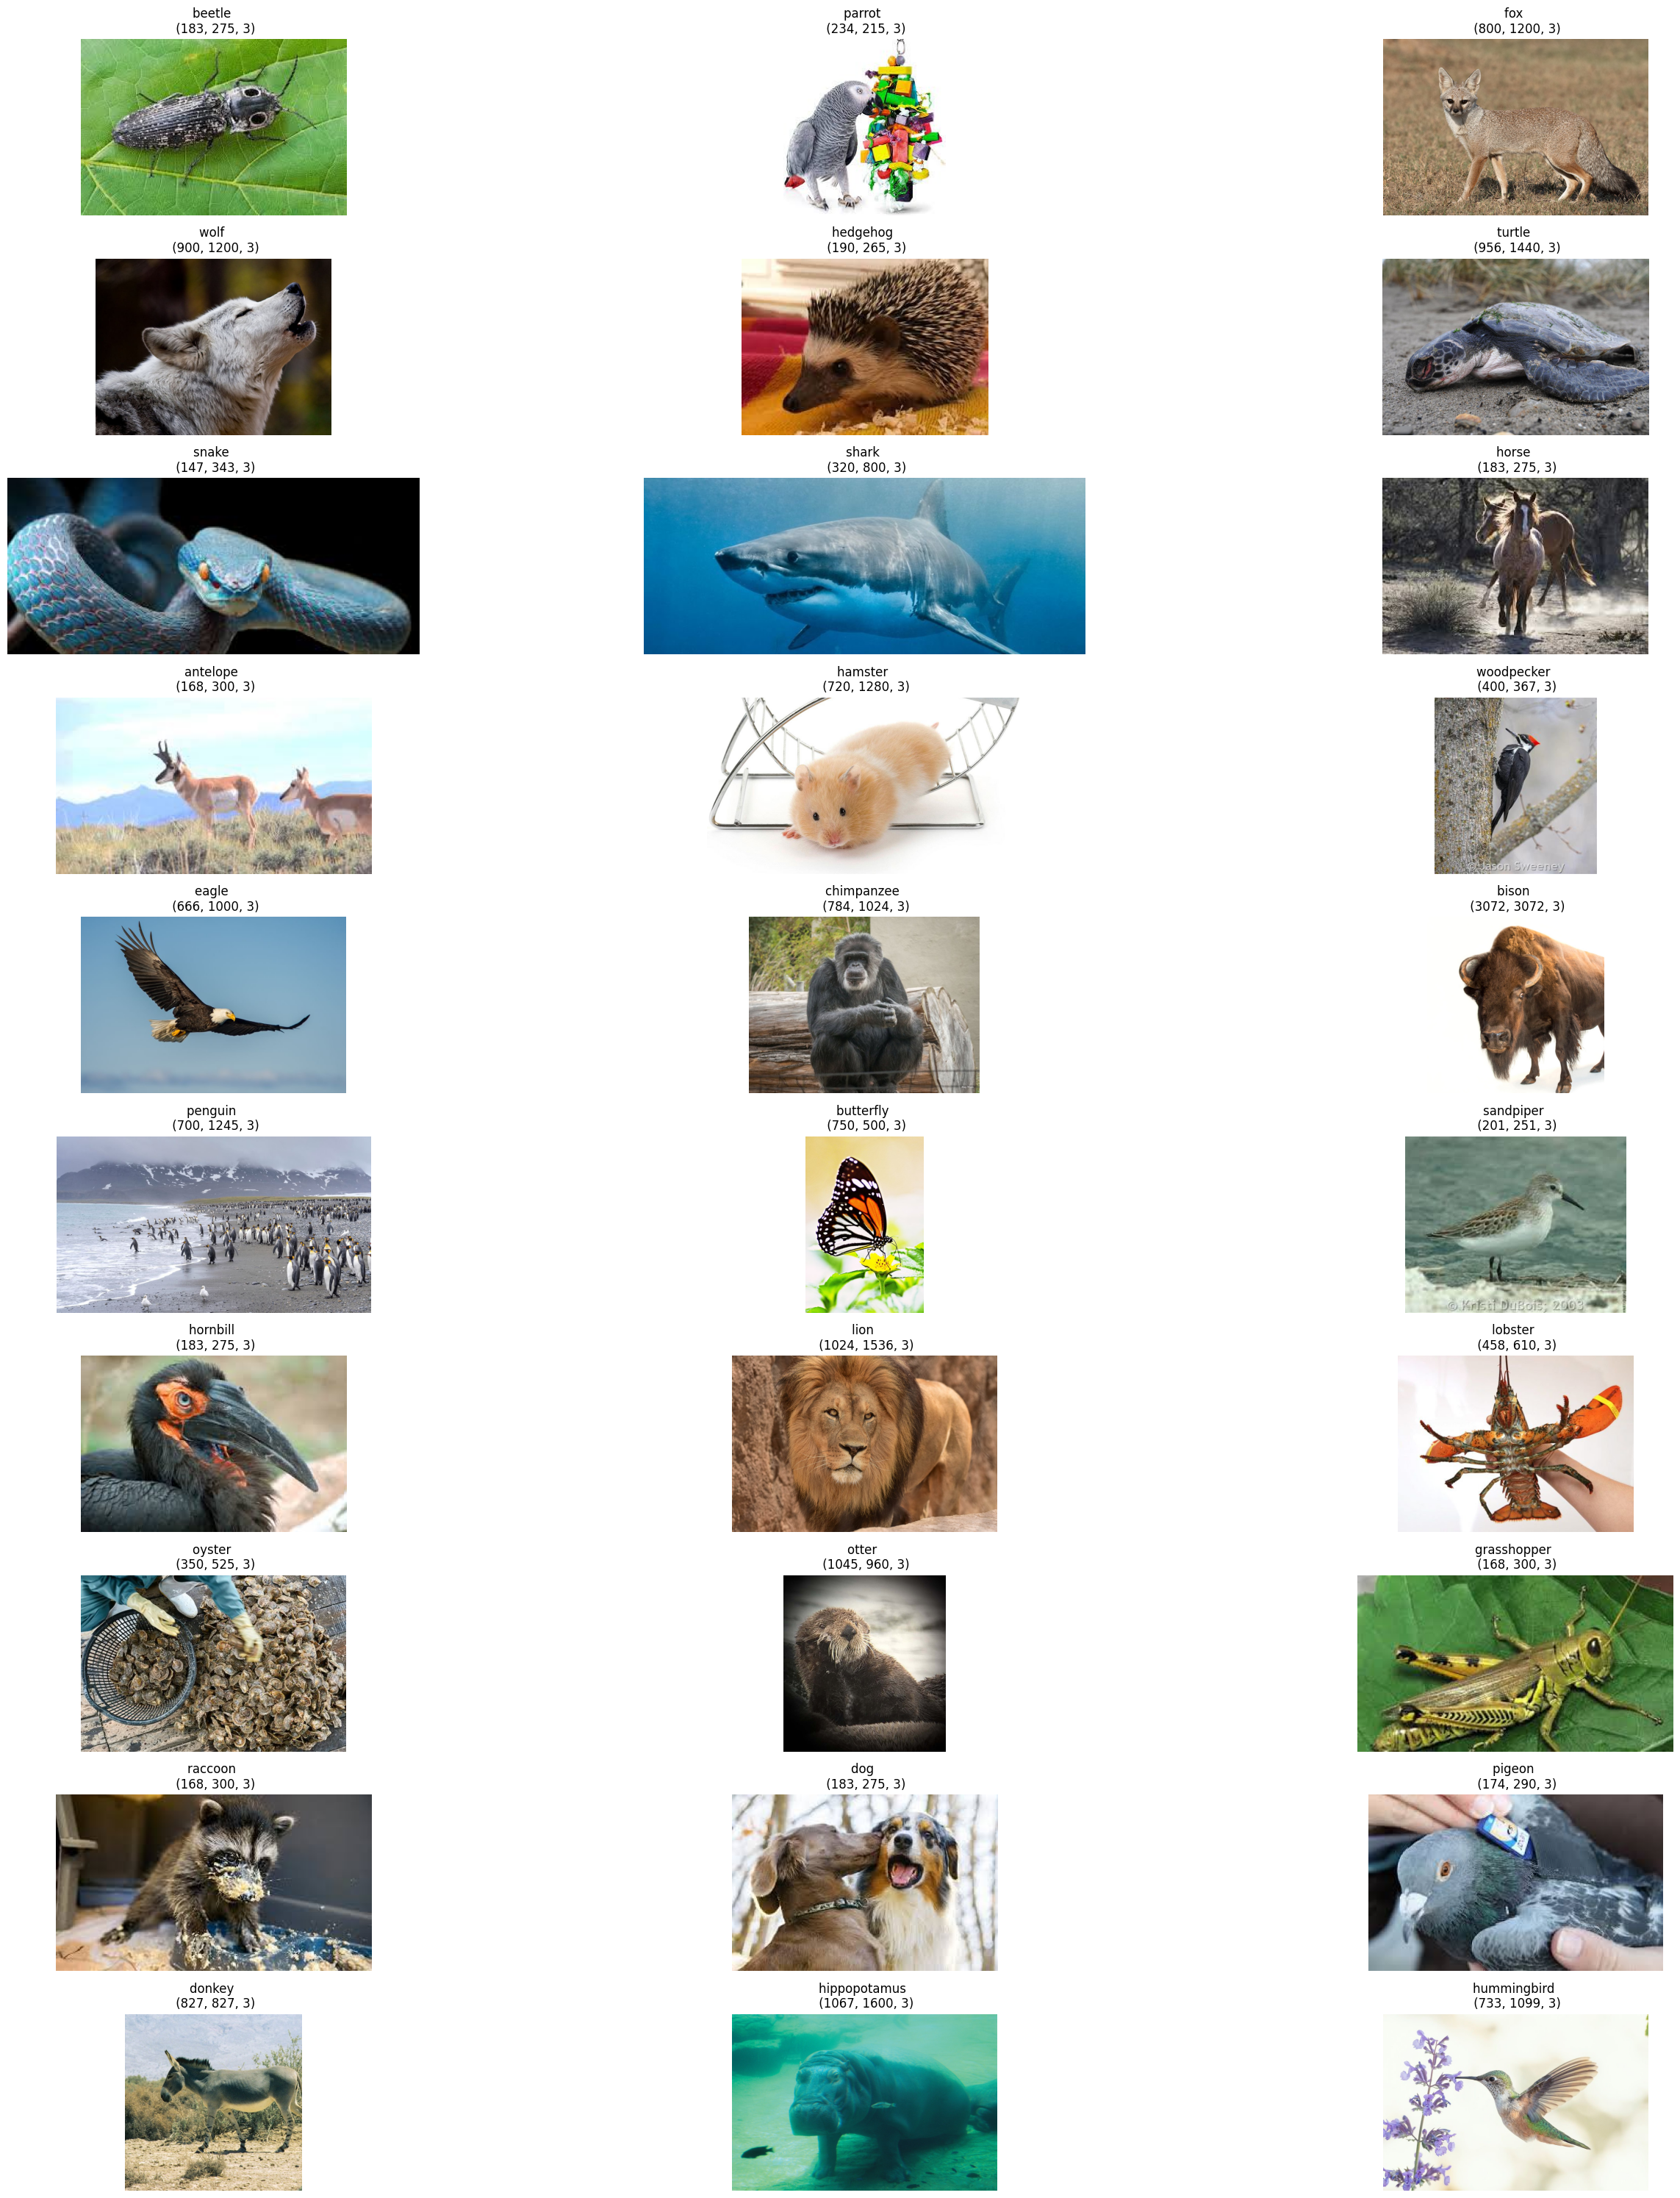

In [20]:
# visualize some sample images from classes
i= 0
plt.figure(figsize = (35 , 30))
for i , class_name in enumerate(classes[:30]):
  class_path = os.path.join(dataset_path, class_name)
  img_name = os.listdir(class_path)[0]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  #  # Calculate the row and column indices for the subplot
  # row = i // 5  # Divide by number of columns to get row index
  # col = i % 3   # Use modulo to get column index

  plt.subplot(10, 3, i+1)
  plt.imshow(img)
  plt.title(f'{class_name} \n {img.shape}')
  plt.axis('off')
  plt.tight_layout()
plt.show()


In [29]:
#pre processing the data
#define the image size and batch_size-Trained model - MobileNetV2- 224*224

image_size = (224,224)
batch_size = 64 # there can be 64 imaeg in a batch

#data augementation and preprocesssing
datagen = ImageDataGenerator(
    rescale=1./255,        # we need to rescale this image to get its colour as colour range betn(0,255)
    validation_split = 0.1   # to check my model is performing good or not
)

In [30]:
#training and validation generator
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode  = 'categorical',
    subset = 'training'
)
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 4860 images belonging to 90 classes.
Found 540 images belonging to 90 classes.


In [34]:
# map the classes - class_indices
class_indices = train_generator.class_indices
print(class_indices)

#extract the class manes
class_names = list(class_indices.keys())
print("class_names: ", class_names)

{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 'pigeon': 64, 'porcupine': 65, 'possum': 66, 'raccoon': 67, 'rat': 68, 'reindeer': 69, 'rhinoceros': 